In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.stats import entropy
import numpy as np
import altair as alt 
import plotly.graph_objects as go
import seaborn as sns

In [3]:
df_redwood = pd.read_excel("redwood.xlsx")
df_joshua = pd.read_excel("joshua.xlsx")
df_sequoia = pd.read_excel("sequoia.xlsx")

# combine them into one dataframe
df_combined = pd.concat([df_redwood, df_joshua, df_sequoia], ignore_index=True)
df_combined.shape

(10661, 33)

In [5]:
df_combined.isnull().sum()

Region                 10661
Park Code                  0
Park Name                  0
Category                   0
Category Sort              0
Order                    500
Family                   504
Taxon Code                 0
TSN                       47
Taxon Record Status        0
Scientific Name            0
Common Names            4166
Synonyms                9954
Park Accepted              0
Sens?                      0
Record Status              0
Occurrence              5315
Occurrence Tags        10563
Nativeness              5324
Nativeness Tags        10651
Abundance               6376
NPS Tags                9255
Park Tags              10636
Internal Park Tags     10661
References               678
Observations            9455
Vouchers                7034
ExternalLinks          10661
T&E                     9814
State Status           10463
Ozone                  10614
GRank                   4809
SRank                   6005
dtype: int64

In [7]:
# drop columns with large amount of missing values
df_combined = df_combined.drop(['Region', 'Internal Park Tags', 'ExternalLinks', 'Ozone', 'Park Tags', 'Nativeness Tags', 'Occurrence Tags'], axis=1)
df_combined.shape

(10661, 26)

In [9]:
# drop species not in park or unconfirmed
df_combined = df_combined[~df_combined['Occurrence'].isin(['Not In Park', 'Unconfirmed'])]
df_combined.shape

(10070, 26)

In [11]:
# drop species with no family/order name
df_combined = df_combined[~df_combined['Order'].isnull()]
df_combined = df_combined[~df_combined['Family'].isnull()]
df_combined = df_combined[df_combined['Record Status'].isin(['Approved'])]

In [13]:
df_combined.isnull().sum()

Park Code                 0
Park Name                 0
Category                  0
Category Sort             0
Order                     0
Family                    0
Taxon Code                0
TSN                      32
Taxon Record Status       0
Scientific Name           0
Common Names             60
Synonyms               3800
Park Accepted             0
Sens?                     0
Record Status             0
Occurrence                0
Nativeness                0
Abundance               338
NPS Tags               3116
References              301
Observations           3446
Vouchers               1333
T&E                    3792
State Status           4275
GRank                   743
SRank                   985
dtype: int64

In [31]:
df_combined['References_fill'] = df_combined['References'].fillna(0)

In [33]:
df_combined.isnull().sum()

Park Code                 0
Park Name                 0
Category                  0
Category Sort             0
Order                     0
Family                    0
Taxon Code                0
TSN                      30
Taxon Record Status       0
Scientific Name           0
Common Names             44
Synonyms               3527
Park Accepted             0
Sens?                     0
Record Status             0
Occurrence                0
Nativeness                0
Abundance               292
NPS Tags               2847
References                0
Observations           3206
Vouchers               1234
T&E                    3511
State Status           3979
GRank                   675
SRank                   895
References_Filled         0
References_fill           0
dtype: int64

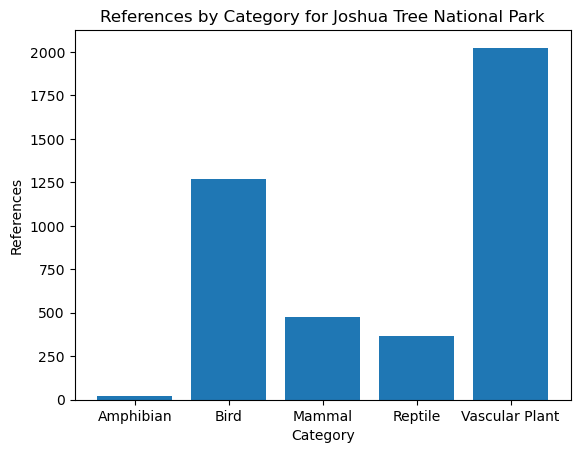

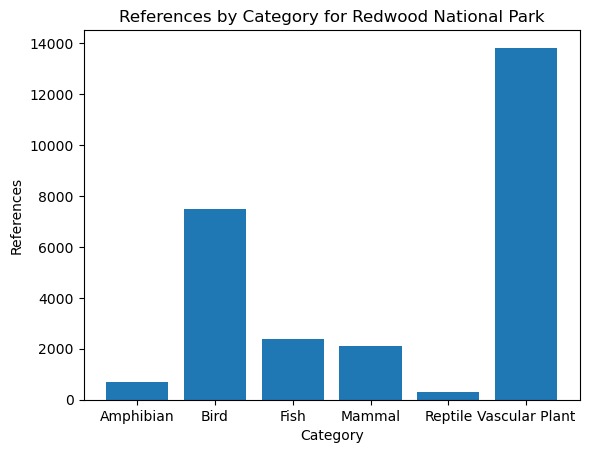

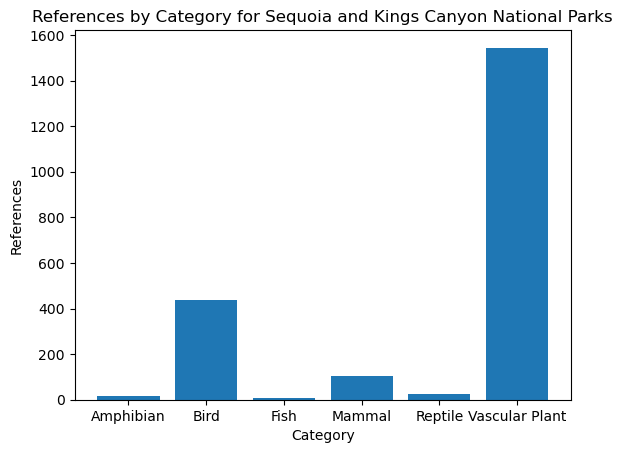

In [35]:
group_df = df_combined.groupby(['Park Name', 'Category'])['References'].sum().reset_index()

def references_category(df, park_name):
    park_df = df[df['Park Name'] == park_name]
    plt.bar(park_df['Category'], park_df['References'])
    plt.title(f'References by Category for {park_name}')
    plt.xlabel('Category')
    plt.ylabel('References')
    plt.show()

parks = group_df['Park Name'].unique()
for park in parks:
    references_category(group_df, park)